# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from keras.layers import Convolution2D , MaxPooling2D , Dense ,Flatten, Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Read data from csv

In [2]:
df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')

# Splits the DataFrame into features (X) and labels (Y).
# X contains all columns except the last one, and Y contains only the last column.
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

# Dataset before resampling

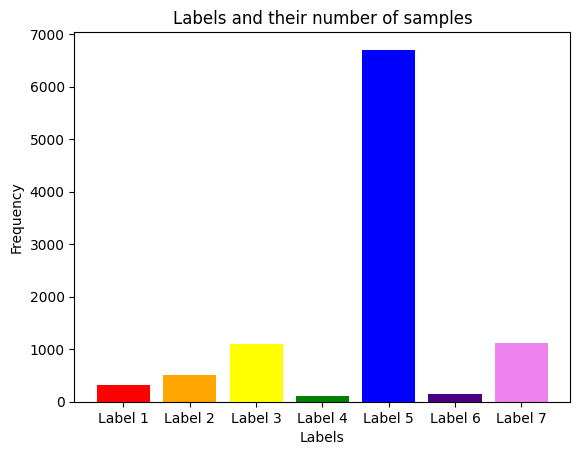

In [3]:
def printDataBalance(Y):
    data = [0 for _ in range(7)]
    for i in Y:
        data[i] += 1

    # Colors for each bar
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

    # Create histogram
    plt.bar(range(len(data)), data, color=colors)

    # Adding labels and title
    plt.xlabel('Labels')
    plt.ylabel('Frequency')
    plt.title('Labels and their number of samples')

    # Customize x-axis ticks
    plt.xticks(range(len(data)), ['Label {}'.format(i+1) for i in range(len(data))])

printDataBalance(Y)

# Applying oversampling to features (X) and labels (Y): to balance the dataset

In [4]:
oversample = RandomOverSampler(random_state=42)
X, Y  = oversample.fit_resample(X, Y)

X = X.to_numpy()
Y = Y.to_numpy()

# Dataset after resampling

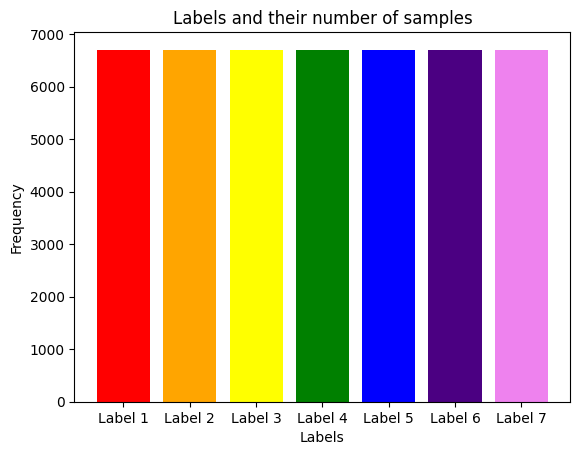

In [5]:
printDataBalance(Y)

# Reshaping Dataset

In [6]:
# Reshapes the features to have a 4D shape
# compatible with convolutional layers (height, width, channels)
# and normalizes the pixel values to be between 0 and 1.

Y = np.reshape(Y ,(46935,1))
X = np.reshape(X , (46935 , 28 , 28, 3))
Actual_X = X
Actual_Y = Y
X = X/256

# Callbacks for Model

In [7]:
# Callback to reducing the learning rate during training if
# monitored metric (val_accuracy in this case) does not improve.

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

early_stopping_callback = EarlyStopping(monitor='val_accuracy',  # Monitor validation accuracy
                                       patience=5,  # Number of epochs with no improvement after which training will be stopped
                                       restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity


# CNN Model

In [8]:
# Model architecture
def model_function():
    model = Sequential([
        # Convolutional layers
        Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3), padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Convolution2D(64, (3, 3), activation='relu', padding='same'),
        Convolution2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Convolution2D(128, (3, 3), activation='relu', padding='same'),
        Convolution2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Convolution2D(256, (3, 3), activation='relu', padding='same'),
        Convolution2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        # Flatten and dense layers
        Flatten(),
        Dropout(rate=0.2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(32, activation='relu'),
        BatchNormalization(),
        # Output layer
        Dense(7, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = model_function()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0

# K-Fold Validation

Epoch 1/25
294/294 [==============================] - 108s 353ms/step - loss: 0.9304 - accuracy: 0.6596 - val_loss: 3.3872 - val_accuracy: 0.1535 - lr: 0.0010
Epoch 2/25
294/294 [==============================] - 102s 348ms/step - loss: 0.3751 - accuracy: 0.8649 - val_loss: 1.1317 - val_accuracy: 0.6558 - lr: 0.0010
Epoch 3/25
294/294 [==============================] - 102s 348ms/step - loss: 0.2307 - accuracy: 0.9177 - val_loss: 0.3497 - val_accuracy: 0.8727 - lr: 0.0010
Epoch 4/25
294/294 [==============================] - 102s 348ms/step - loss: 0.1607 - accuracy: 0.9417 - val_loss: 1.6833 - val_accuracy: 0.6047 - lr: 0.0010
Epoch 5/25
294/294 [==============================] - ETA: 0s - loss: 0.1263 - accuracy: 0.9556
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
294/294 [==============================] - 102s 348ms/step - loss: 0.1263 - accuracy: 0.9556 - val_loss: 0.3772 - val_accuracy: 0.8721 - lr: 0.0010
Epoch 6/25
294/294 [========================

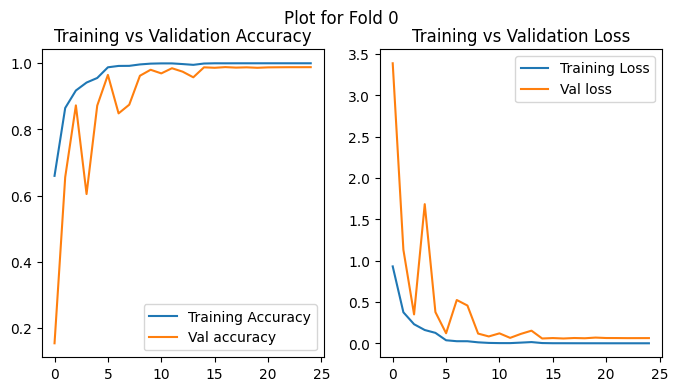

Epoch 1/25
294/294 [==============================] - 109s 359ms/step - loss: 0.9075 - accuracy: 0.6710 - val_loss: 2.8474 - val_accuracy: 0.2490 - lr: 0.0010
Epoch 2/25
294/294 [==============================] - 107s 363ms/step - loss: 0.3822 - accuracy: 0.8615 - val_loss: 0.7525 - val_accuracy: 0.7280 - lr: 0.0010
Epoch 3/25
294/294 [==============================] - 105s 357ms/step - loss: 0.2469 - accuracy: 0.9112 - val_loss: 1.1268 - val_accuracy: 0.6621 - lr: 0.0010
Epoch 4/25
294/294 [==============================] - ETA: 0s - loss: 0.1773 - accuracy: 0.9370
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
294/294 [==============================] - 104s 354ms/step - loss: 0.1773 - accuracy: 0.9370 - val_loss: 1.8779 - val_accuracy: 0.5885 - lr: 0.0010
Epoch 5/25
294/294 [==============================] - 105s 357ms/step - loss: 0.0771 - accuracy: 0.9749 - val_loss: 0.1507 - val_accuracy: 0.9469 - lr: 5.0000e-04
Epoch 6/25
294/294 [====================

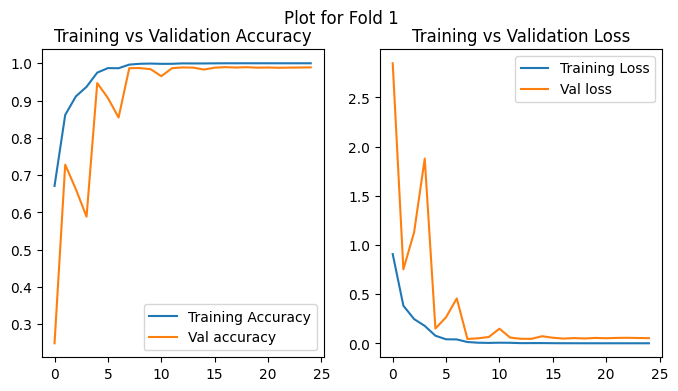

Epoch 1/25
294/294 [==============================] - 108s 352ms/step - loss: 1.0056 - accuracy: 0.6279 - val_loss: 2.5571 - val_accuracy: 0.2459 - lr: 0.0010
Epoch 2/25
294/294 [==============================] - 102s 348ms/step - loss: 0.4141 - accuracy: 0.8493 - val_loss: 0.6220 - val_accuracy: 0.7795 - lr: 0.0010
Epoch 3/25
294/294 [==============================] - 102s 347ms/step - loss: 0.2710 - accuracy: 0.9018 - val_loss: 0.5456 - val_accuracy: 0.8141 - lr: 0.0010
Epoch 4/25
294/294 [==============================] - 102s 347ms/step - loss: 0.1815 - accuracy: 0.9347 - val_loss: 0.3396 - val_accuracy: 0.8851 - lr: 0.0010
Epoch 5/25
294/294 [==============================] - 102s 349ms/step - loss: 0.1478 - accuracy: 0.9479 - val_loss: 0.8445 - val_accuracy: 0.7425 - lr: 0.0010
Epoch 6/25
294/294 [==============================] - ETA: 0s - loss: 0.1077 - accuracy: 0.9617
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
294/294 [========================

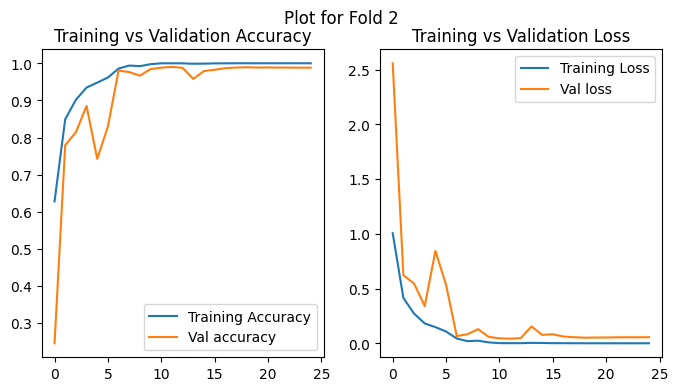

Epoch 1/25
294/294 [==============================] - 107s 351ms/step - loss: 0.9509 - accuracy: 0.6524 - val_loss: 3.6099 - val_accuracy: 0.1822 - lr: 0.0010
Epoch 2/25
294/294 [==============================] - 102s 349ms/step - loss: 0.3838 - accuracy: 0.8606 - val_loss: 1.3544 - val_accuracy: 0.5632 - lr: 0.0010
Epoch 3/25
294/294 [==============================] - 102s 348ms/step - loss: 0.2397 - accuracy: 0.9147 - val_loss: 2.0174 - val_accuracy: 0.4775 - lr: 0.0010
Epoch 4/25
294/294 [==============================] - 103s 350ms/step - loss: 0.1824 - accuracy: 0.9342 - val_loss: 0.4175 - val_accuracy: 0.8706 - lr: 0.0010
Epoch 5/25
294/294 [==============================] - 103s 351ms/step - loss: 0.1418 - accuracy: 0.9494 - val_loss: 0.4599 - val_accuracy: 0.8505 - lr: 0.0010
Epoch 6/25
294/294 [==============================] - ETA: 0s - loss: 0.1189 - accuracy: 0.9578
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
294/294 [========================

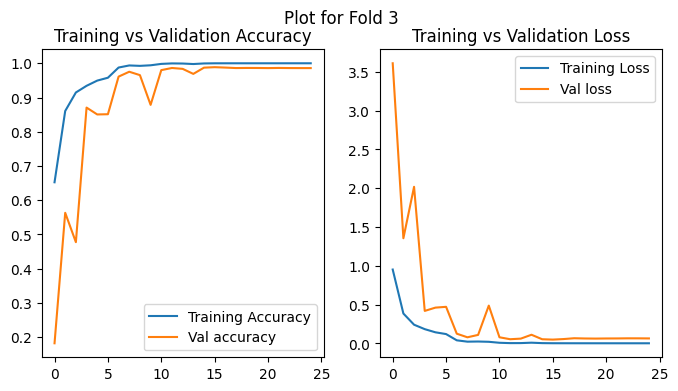

Epoch 1/25
294/294 [==============================] - 107s 353ms/step - loss: 1.0159 - accuracy: 0.6299 - val_loss: 4.6380 - val_accuracy: 0.1447 - lr: 0.0010
Epoch 2/25
294/294 [==============================] - 103s 350ms/step - loss: 0.3920 - accuracy: 0.8600 - val_loss: 0.8508 - val_accuracy: 0.6989 - lr: 0.0010
Epoch 3/25
294/294 [==============================] - 102s 348ms/step - loss: 0.2387 - accuracy: 0.9140 - val_loss: 0.5593 - val_accuracy: 0.8293 - lr: 0.0010
Epoch 4/25
294/294 [==============================] - 103s 350ms/step - loss: 0.1763 - accuracy: 0.9369 - val_loss: 0.6352 - val_accuracy: 0.8081 - lr: 0.0010
Epoch 5/25
294/294 [==============================] - ETA: 0s - loss: 0.1390 - accuracy: 0.9508
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
294/294 [==============================] - 102s 348ms/step - loss: 0.1390 - accuracy: 0.9508 - val_loss: 0.5895 - val_accuracy: 0.8240 - lr: 0.0010
Epoch 6/25
294/294 [========================

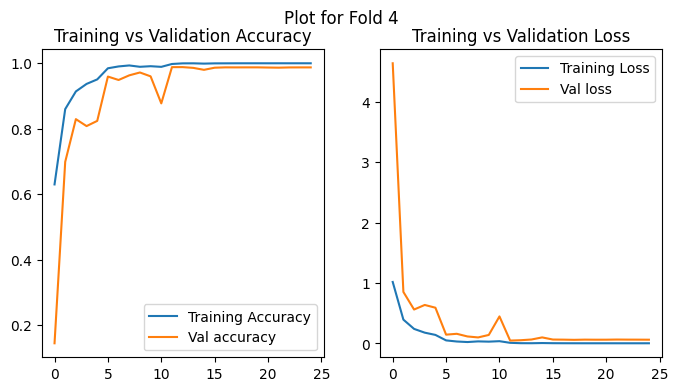

In [9]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
i = 0

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = model_function()

    # Train the model
    fitting_stats = model.fit(X_train , y_train , epochs = 25 , batch_size=128 , validation_data=(X_test , y_test),
              callbacks=[learning_rate_reduction])

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy}")


    acc = fitting_stats.history['accuracy']
    val_acc = fitting_stats.history['val_accuracy']

    loss = fitting_stats.history['loss']
    val_loss = fitting_stats.history['val_loss']


    plt.figure(figsize=(8,4))

    plt.subplot(1 , 2 , 1 )
    plt.plot(range(25) , acc , label="Training Accuracy")
    plt.plot(range(25) , val_acc , label="Val accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend(loc="lower right")


    plt.subplot(1 , 2 , 2 )
    plt.plot(range(25) , loss  , label="Training Loss")
    plt.plot(range(25) , val_loss , label="Val loss")
    plt.title("Training vs Validation Loss")
    plt.legend(loc="upper right")


    plt.suptitle('Plot for Fold '+ str(i) )
    plt.show()
    i = i+1
